In [ ]:
# DNN alorithm using Tensor flow we have already done the eda on credit card data and we kown that it is a imblance data and we will be using the smote to handle the imbalance in the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/yup here is the data/creditcard (1).csv')


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 56962
Resampled dataset shape 113728


In [ ]:
x_smote.shape,y_smote.shape

((113728, 29), (113728,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 30)

In [ ]:
from tensorflow import keras

In [ ]:
def get_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape = [x_train.shape[-1]]),# input layer
      keras.layers.Dense(512, activation = 'relu'),# hidden layers
      keras.layers.Dense(256, activation = 'relu'),
      keras.layers.Dense(128, activation = 'relu'),
      keras.layers.Dense(64, activation = 'relu'),
      keras.layers.Dense(32, activation = 'relu'),
      keras.layers.Dropout(0.5), # hyerparamter
      keras.layers.Dense(2,activation = 'sigmoid')# output layer
  ])
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(len(x_train)).batch(batch_size) # converting into tensor
val_df = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size) # converting into tensor

model = get_model()
fit = model.fit(train_ds,validation_data = val_df, epochs = 5)

Epoch 1/5
178/178 [==============================] - 6s 20ms/step - loss: 0.1983 - accuracy: 0.9350 - val_loss: 0.0761 - val_accuracy: 0.9838
Epoch 2/5
178/178 [==============================] - 3s 18ms/step - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0635 - val_accuracy: 0.9755
Epoch 3/5
178/178 [==============================] - 3s 18ms/step - loss: 0.0473 - accuracy: 0.9833 - val_loss: 0.0425 - val_accuracy: 0.9809
Epoch 4/5
178/178 [==============================] - 4s 21ms/step - loss: 0.0355 - accuracy: 0.9880 - val_loss: 0.0213 - val_accuracy: 0.9916
Epoch 5/5
178/178 [==============================] - 3s 18ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0280 - val_accuracy: 0.9913


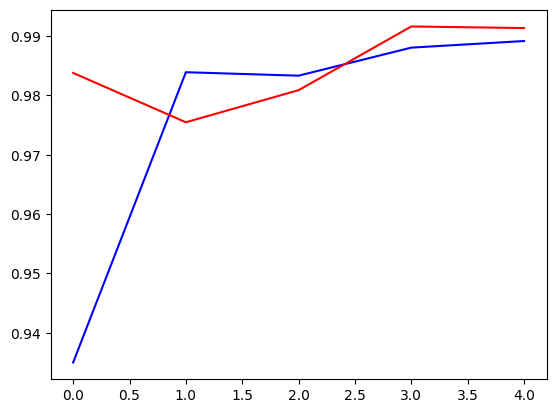

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [ ]:
y_pred_nn = model.predict(val_ds)[:,1]
y_pred_nn = list(y_pred_nn)
y_pred_nn[:5]

45/45 [==============================] - 1s 10ms/step


[4.8494795e-25, 1.0, 1.0, 8.449251e-25, 1.6541384e-12]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print('ROCAUC score:', roc_auc_score(y_test, y_pred_nn))
#print('Accuracy score:', accuracy_score(y_test, y_pred_nn))

ROCAUC score: 0.9994792642486471


In [ ]:
from sklearn.metrics import precision_recall_curve,auc

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_nn)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9993631176547345


In [ ]:
y_pred_nn[:5]

[4.8494795e-25, 1.0, 1.0, 8.449251e-25, 1.6541384e-12]

In [ ]:
y_test[:5]

54369     0
106551    1
96197     1
19147     0
22236     0
Name: Target, dtype: int64